# DEEP EUTECTIC SOLVENTS. MELTING TEMPERATURE. ML ALGORITHMS 

## 1. Preparation

In [1]:
#importazione librerie
import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches
import seaborn            as sns
import itertools
import time
import shap


from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error
from math                    import sqrt
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics         import r2_score, mean_squared_error
from sklearn.model_selection import GroupKFold
from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor
from xgboost                 import XGBRegressor
from catboost                import CatBoostRegressor
from sklearn.svm             import SVR
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.metrics         import mean_squared_error
from sklearn.linear_model    import Ridge
from sklearn.ensemble        import GradientBoostingRegressor
from sklearn.tree            import DecisionTreeRegressor
from sklearn.neural_network  import MLPRegressor
from matplotlib.colors       import ColorConverter
from prettytable             import PrettyTable


### 1.1. Working with the table
First you need to edit the table a little and see its main characteristics for further machine learning

In [2]:
#apertura dataset
df = pd.read_csv('DES_TMELT_ML.csv')
df

,Unnamed: 0,"Tmelt, K",Smiles#1,Smiles#2,Component#1,Component#2,X#1 (molar fraction),X#2 (molar fraction),T#1,T#2,...,fr_Al_COO,fr_Ar_COO,fr_Ar_N,fr_Ar_OH,fr_NH0,fr_NH1,fr_amide,AROM,ALERTS,n_HM
0,0,294.15,Cl[Fe](Cl)Cl,C[N+](C)(C)CCO.[Cl-],NaN,NaN,0.670,0.330,580.15,575.15,...,0.00,0.0,0.0,0.0,0.33,0.0,0.0,0.000,1.00,0.67
1,1,321.15,Br[Zn]Br,CC(=O)[O-].C[N+](C)(C)CCO,NaN,NaN,0.670,0.330,667.15,324.15,...,0.33,0.0,0.0,0.0,0.33,0.0,0.0,0.000,1.00,0.67
2,2,311.15,Br[Zn]Br,C[N+](C)(C)CCO.[Cl-],NaN,NaN,0.670,0.330,567.15,575.15,...,0.00,0.0,0.0,0.0,0.33,0.0,0.0,0.000,1.00,0.67
3,3,296.15,Cl[Zn]Cl,C[N+](C)(C)CCCl.Cl,NaN,NaN,0.670,0.330,563.15,513.15,...,0.00,0.0,0.0,0.0,0.33,0.0,0.0,0.000,1.33,0.67
4,4,314.77,Cl[Zn]Cl,C[N+](C)(C)CCO.[Cl-],NaN,NaN,0.500,0.500,563.15,575.15,...,0.00,0.0,0.0,0.0,0.50,0.0,0.0,0.000,1.00,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2650,317.60,C[N+](C)(C)CCO.[Cl-],C[N+](C)(CCO)Cc1ccccc1.[Cl-],2-hydroxyethyl(trimethyl)azanium;chloride,benzyl-(2-hydroxyethyl)-dimethylazanium;chloride,0.303,0.697,578.15,351.42,...,0.00,0.0,0.0,0.0,1.00,0.0,0.0,0.697,1.00,0.00
2651,2651,330.50,C[N+](C)(C)CCO.[Cl-],C[N+](C)(CCO)Cc1ccccc1.[Cl-],2-hydroxyethyl(trimethyl)azanium;chloride,benzyl-(2-hydroxyethyl)-dimethylazanium;chloride,0.222,0.778,578.15,351.42,...,0.00,0.0,0.0,0.0,1.00,0.0,0.0,0.778,1.00,0.00
2652,2652,331.50,C[N+](C)(C)CCO.[Cl-],C[N+](C)(CCO)Cc1ccccc1.[Cl-],2-hydroxyethyl(trimethyl)azanium;chloride,benzyl-(2-hydroxyethyl)-dimethylazanium;chloride,0.197,0.803,578.15,351.42,...,0.00,0.0,0.0,0.0,1.00,0.0,0.0,0.803,1.00,0.00
2653,2653,338.80,C[N+](C)(C)CCO.[Cl-],C[N+](C)(CCO)Cc1ccccc1.[Cl-],2-hydroxyethyl(trimethyl)azanium;chloride,benzyl-(2-hydroxyethyl)-dimethylazanium;chloride,0.114,0.886,578.15,351.42,...,0.00,0.0,0.0,0.0,1.00,0.0,0.0,0.886,1.00,0.00


In [3]:
df.columns

Index(['Unnamed: 0', 'Tmelt, K', 'Smiles#1', 'Smiles#2', 'Component#1',
       'Component#2', 'X#1 (molar fraction)', 'X#2 (molar fraction)', 'T#1',
       'T#2', 'MW', 'HBD', 'fr_Al_COO', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_OH',
       'fr_NH0', 'fr_NH1', 'fr_amide', 'AROM', 'ALERTS', 'n_HM'],
      dtype='object')

In [4]:
#questo blocco serve per sistemare il dataset per i mocdelli
# creating a DataFrame df_unique with a list of unique combinations from component columns
df_unique = df[['Component#1','Component#2']].drop_duplicates()
df_unique = df_unique.reset_index(drop=True)
df_unique = df_unique.reset_index()  # convert indexes to a column
df_unique['index_col'] = df_unique['index']  # create a new column and assign it the values of the column with indexes
# combine df2 and df_unique by Component#1 and Component#2 columns
merged = df.merge(df_unique, on=['Component#1', 'Component#2'])
# create the indexes column and fill it with values from the index column from df_unique
merged['indexes'] = merged['index']
# we remove the index column from merged, since we no longer need it
merged.drop('index', axis=1, inplace=True)

#Adapted columns to new dataframe 
df = merged.drop(['Component#1', 'Component#2', 'X#2 (molar fraction)',
                  'Smiles#1', 'Smiles#2', 'index_col'], axis=1)

#Adapted columns to new dataframe 
df = df[['Tmelt, K', 'X#1 (molar fraction)','T#1',
       'T#2', 'MW', 'HBD', 'fr_Al_COO', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_OH',
       'fr_NH0', 'fr_NH1', 'fr_amide', 'AROM', 'ALERTS', 'n_HM', 'indexes']]

# One-hot encoding removed for the abscence of Type of DES column

df = df.rename(columns={'indexes': 'ind_syst'})


In [5]:
#Qiesta parte ggiunta da me si può attivare e disattivare e serve per addestrare il modello senza le temperaure di fusione dei componenti
#df= df.drop(columns = {'Tmelt#1', 'Tmelt#2'})
#df.head()

### 1.2. Splitting data into test and train

In [6]:
#dividiamo in 5 parti per esegue la 5-fold cross-validation:
#alleniamo per 5 volte il modello, ogni volta utilizzando 4 parti per l'allenamento e una per il test
# # Splitting the mixes-out data (divide the dataset by y_validate and X, divide X by 5 folds. 1 fold: x_train, y_train, x_test, y_test)
def mix_out(x,y,groups,n_splits,test_size):
    mix_out = []
    kfold = GroupShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
    for train_idx, test_idx in kfold.split(x, y, groups):
        mix_out.append((train_idx, test_idx))
    return mix_out

valid_list = []
xy_list = []
valid_list_s = []
xy_list_s = []

# Splitting the selection
y = df.loc[:,'Tmelt, K']
x = df.loc[:,'X#1 (molar fraction)':]
mixture_out = mix_out(x, y, df['ind_syst'], 1, 0.2)
for train_idx, val_idx in mixture_out:
    valid_list.append((x.iloc[train_idx],
                       x.iloc[val_idx],
                       y.iloc[train_idx],
                       y.iloc[val_idx]))

mixture_out = mix_out(valid_list[0][0], valid_list[0][2], valid_list[0][0]['ind_syst'], 5, 0.2)
for train_idx, val_idx in mixture_out:
    # [[x_train, x_test, y_train, y_test], [], [], [], []]
    xy_list.append((valid_list[0][0].iloc[train_idx],
                    valid_list[0][0].iloc[val_idx],
                    valid_list[0][2].iloc[train_idx],
                    valid_list[0][2].iloc[val_idx]))

# Removing the 'ind_syst' column from datasets in the valid_list list
for i, (x_train, x_val, y_train, y_val) in enumerate(valid_list):
    valid_list[i] = (x_train.drop('ind_syst', axis=1),
                     x_val.drop('ind_syst', axis=1),
                     y_train,
                     y_val)

# Removing the 'ind_syst' column from datasets in the xy_list list
for i, (x_train, x_test, y_train, y_test) in enumerate(xy_list):
    xy_list[i] = (x_train.drop('ind_syst', axis=1),
                  x_test.drop('ind_syst', axis=1),
                  y_train,
                  y_test)

# Normalize the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Works better with a list
valid_list_s.append([scaler_x.fit_transform(valid_list[0][0]),
                scaler_x.transform(valid_list[0][1]),
                scaler_y.fit_transform(valid_list[0][2].values.reshape(-1, 1)),
                scaler_y.transform(valid_list[0][3].values.reshape(-1, 1))])
for fold in range(len(xy_list)):
    xy_list_s.append([scaler_x.fit_transform(xy_list[fold][0]),
                scaler_x.transform(xy_list[fold][1]),
                scaler_y.fit_transform(xy_list[fold][2].values.reshape(-1, 1)),
                scaler_y.transform(xy_list[fold][3].values.reshape(-1, 1))])




### 1.3. Functions for plotting and calculating metrics


In [7]:
# Removed def compute_type and all lines in following cells using it

# palette of colors
colors = ['#a5678e','#e8b7d4', '#beb7d9', '#7eabd4', '#31539d']

# font for all charts
plt.rcParams.update({'font.size': 16})

#Creiamo un dataset per salvare tutti i valori (R2/RMSE) dei vari modelli
final_R = pd.DataFrame(columns=["Name ML",'R2 CV', 'RMSE CV', 'R2 Train', 'RMSE Train'])

## 2. Linear Regression
Linear regression is the simplest machine learning method that finds a linear equation that best describes the correlation of dependent variables with independent ones

In [8]:
 #qui iniziamo in successione i vari modelli
param_grid = {
    'alpha': np.arange(0.1, 100, 0.1)
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = Ridge(**param_grid)
    # on five folds
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

Number of combinations 999
The best combination of hyperparameters: {'alpha': np.float64(8.2)}


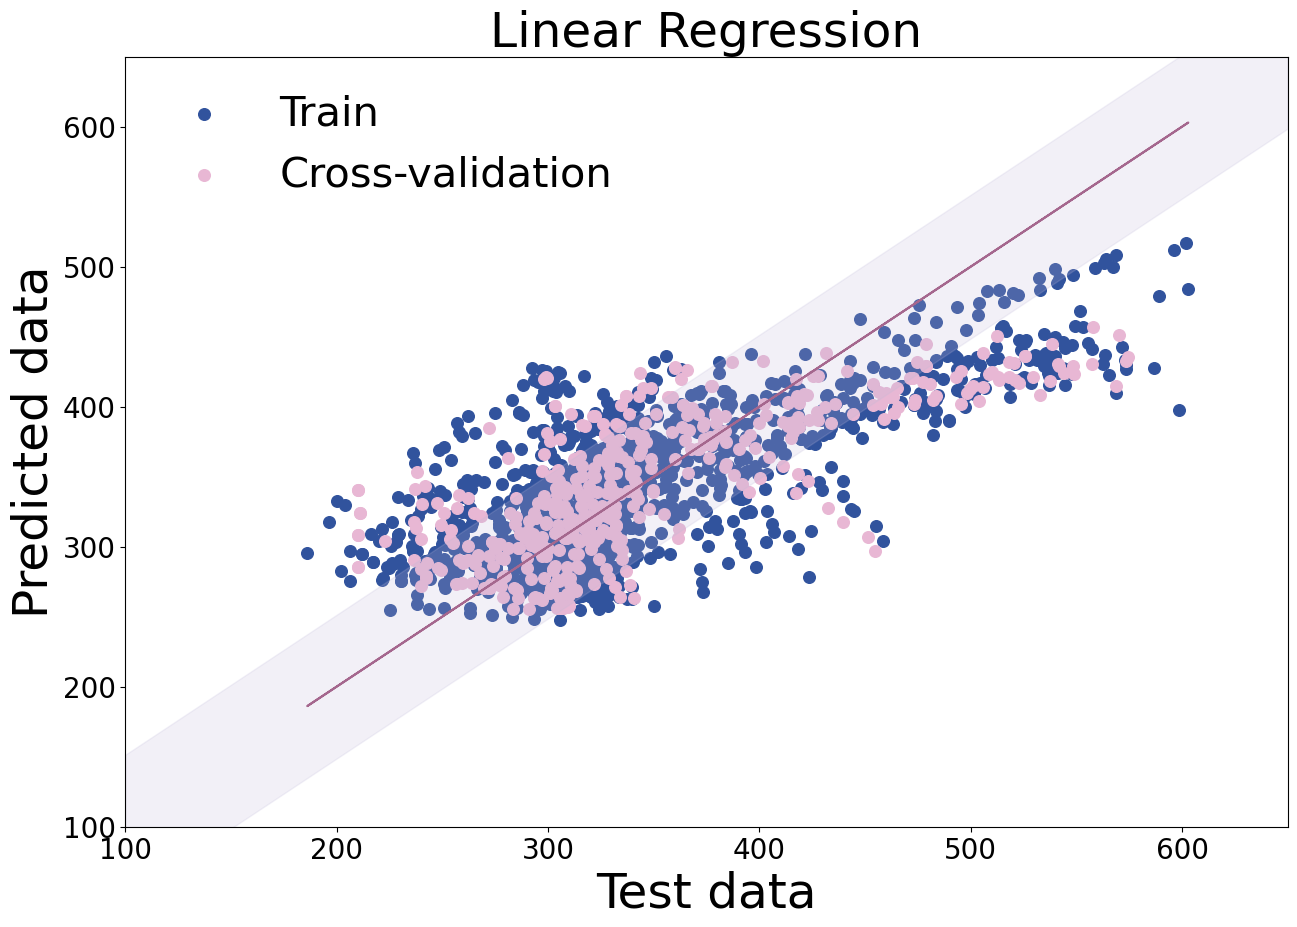

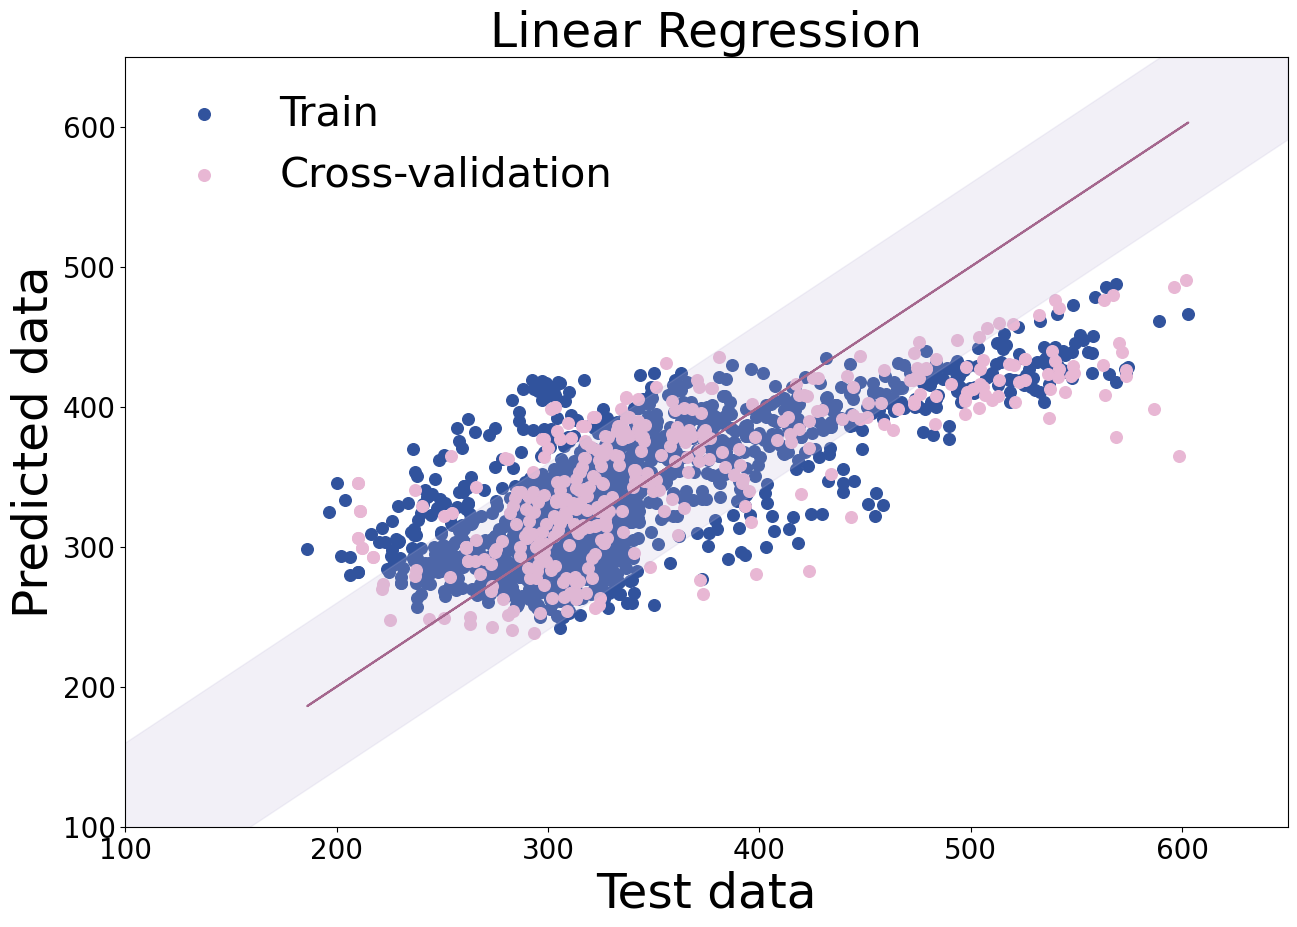

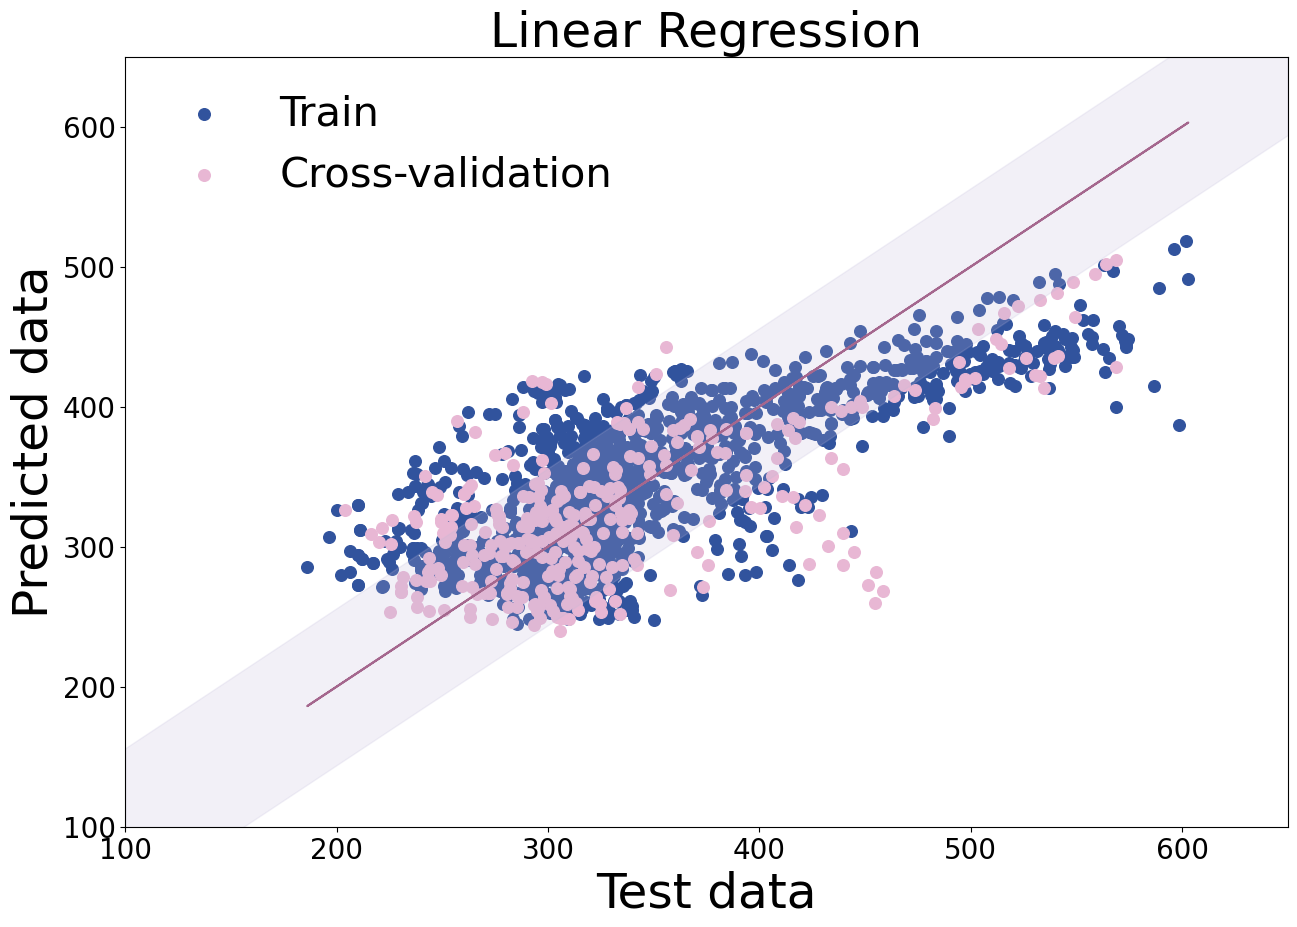

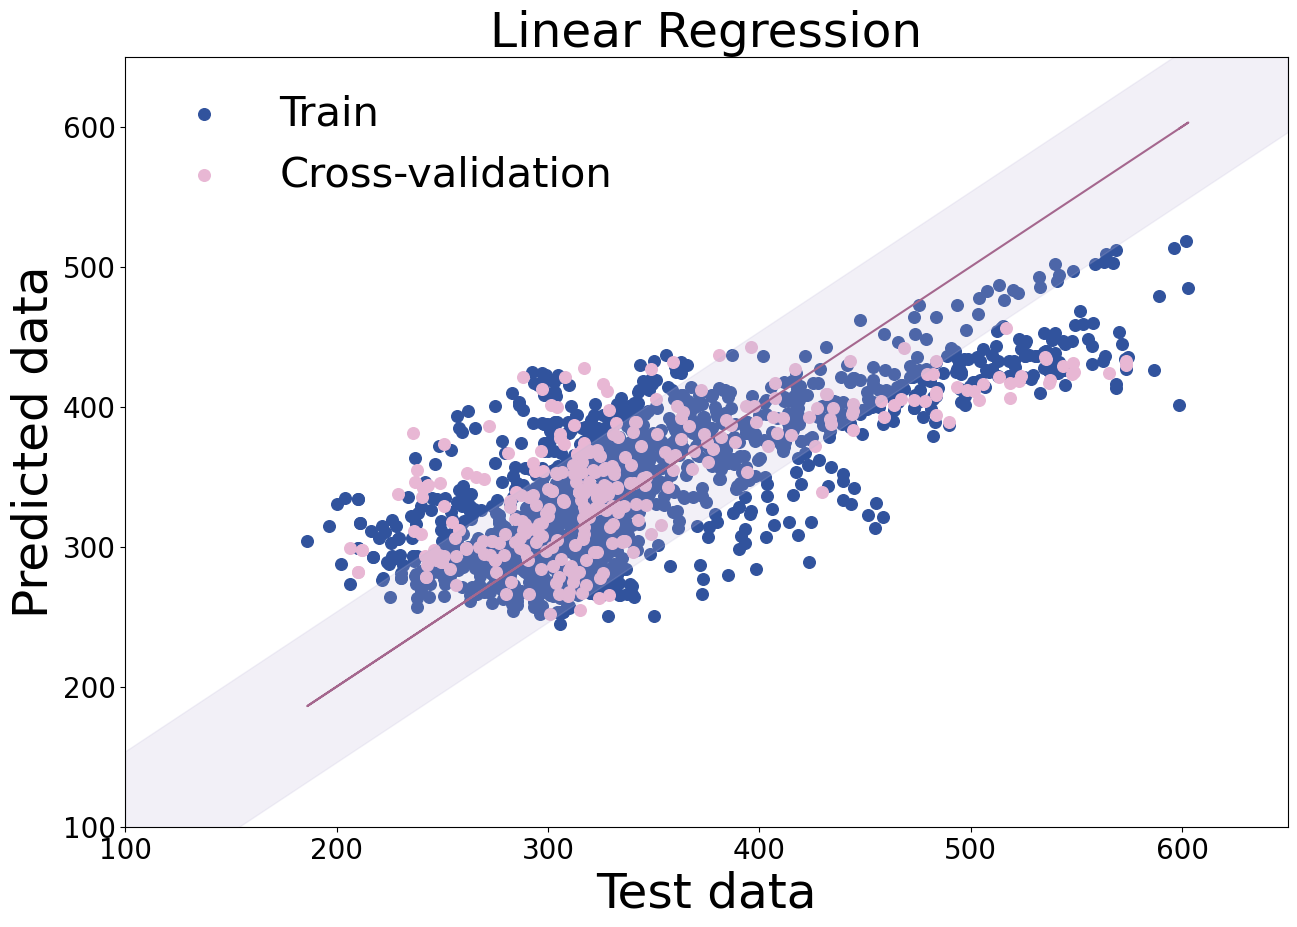

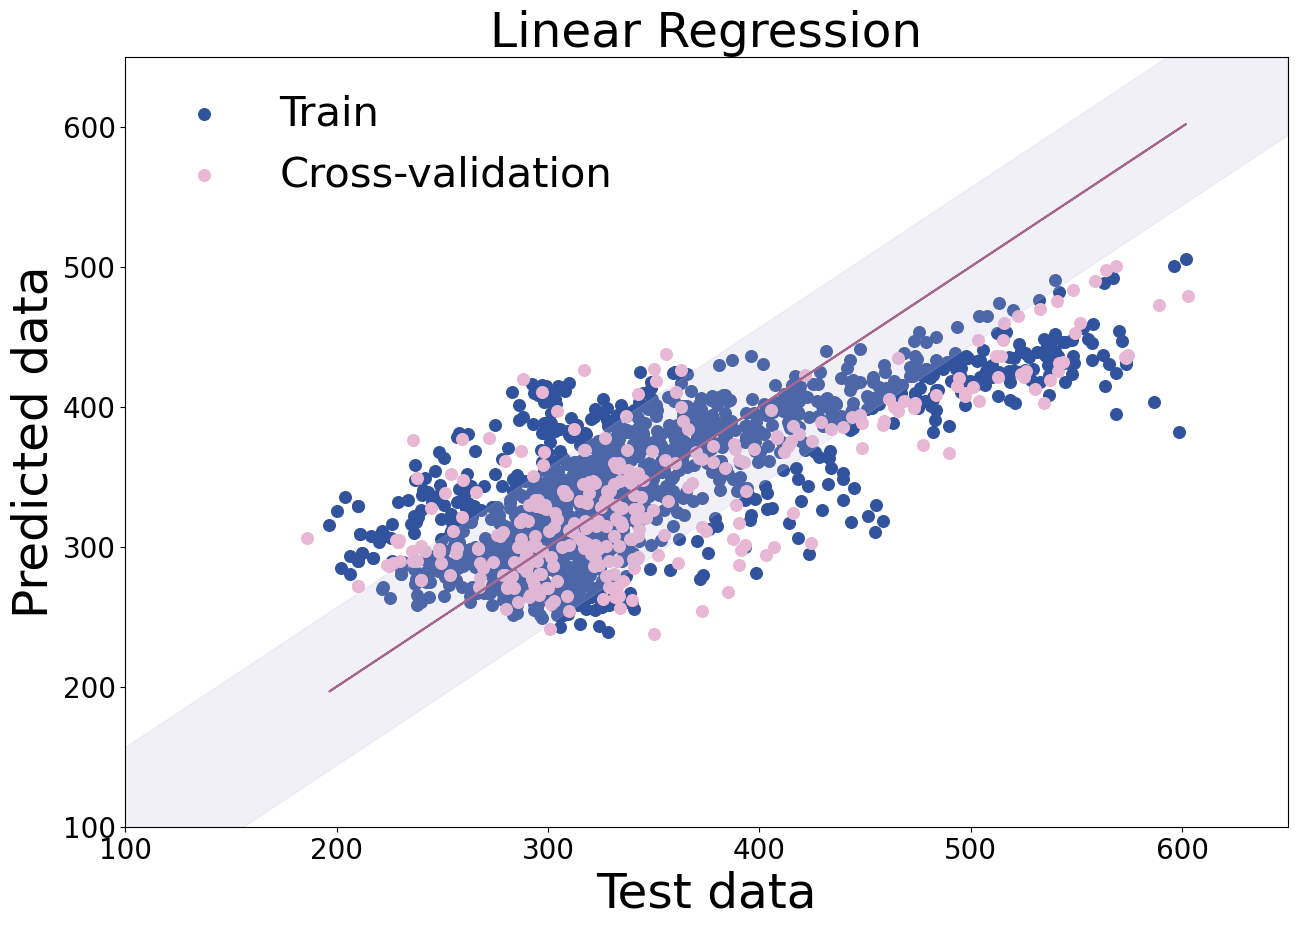

+-------------------------------------------------------------------------------------------------------------------------------------------+
|                                                              LinearRegression                                                             |
+------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+
|  metrics   |        mean        |         1          |         2          |          3          |         4          |         5          |
+------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+
|   R2 CV    | 0.5273723509059971 | 0.5553342061630893 | 0.5562695912513081 | 0.46147707296466856 | 0.5037854104616439 | 0.5599954736892756 |
|  RMSE CV   | 55.438680767568314 |  51.3396506183523  | 59.55040209950757  |  56.033388654794294 | 53.89573601637076  | 56.37422644881662  |
|  R2 

In [9]:
param_grid = {
    'alpha': best_param['alpha']
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = Ridge(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Linear Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.show()

table1 = PrettyTable()
table1.title = "LinearRegression" # в колабе не работает, в vs code работает
table1.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table1.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table1.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table1.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table1.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table1)

#salviamo su un dataset
final_R.loc[len(final_R)] = ['LR', np.mean(r2_list), np.mean(rmse_list), np.mean(r2_train_list), np.mean(rmse_train_list)]

**Output:** Linear regression has low accuracy characteristics, but can be used to compare other methods with it

## 3. Decision trees
A decision tree is a logical classification algorithm that solves classification and regression problems. It is a combination of logical conditions into a tree structure.

### 3.1. Decision Tree Regressor
A decision tree is a decision-making tool that uses a tree-like structure similar to a flowchart, or is a model of decisions and all their possible outcomes, including outcomes, input costs and utility.

In [ ]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None] + list(range(1, 20, 5)),
    'min_samples_split': np.arange(0.05, 1, 0.2),
    'min_samples_leaf': np.arange(0.05, 1, 0.2)
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = DecisionTreeRegressor(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

Number of combinations 500


In [ ]:
param_grid = {
    'criterion': 'poisson',
    'max_depth': None,
    'min_samples_split': 0.05,
    'min_samples_leaf': 0.05,
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = DecisionTreeRegressor(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Decision Tree Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.show()

table8 = PrettyTable()
table8.title = "Decision Tree Regression" 
table8.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table8.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table8.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table8.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table8.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table8)


#salviamo su un dataset
final_R.loc[len(final_R)] = ['DTR', np.mean(r2_list), np.mean(rmse_list), np.mean(r2_train_list), np.mean(rmse_train_list)]

### 3.2. Random Forest Regression
Random forest  is a collective learning method for classification, regression, and other tasks that works by building multiple decision trees during training. For regression problems, the average value or the averaged forecast of individual trees is returned.

In [ ]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [None] + list(range(1, 40, 5)),
    'min_samples_split': range(10, 100, 20),
    'min_samples_leaf': range(10, 100, 20),
    'max_features': [10],
    'bootstrap': [True, False]
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = RandomForestRegressor(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

In [ ]:
param_grid = {
    'n_estimators': 100,
    'max_depth': 31,
    'min_samples_split': 10,
    'min_samples_leaf': 10,
    'max_features': 10,
    'bootstrap': False
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = RandomForestRegressor(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Random Forest Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.show()

table2 = PrettyTable()
table2.title = "Random Forest Regression" 
table2.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table2.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table2.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table2.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table2.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table2)


#salviamo su un dataset
final_R.loc[len(final_R)] = ['RFR', np.mean(r2_list), np.mean(rmse_list), np.mean(r2_train_list), np.mean(rmse_train_list)]

**Output:** Decision trees work better than linear regression, but also with low accuracy


## 4. Boosting
Boosting is a procedure for sequentially constructing the composition of machine learning algorithms, when each subsequent algorithm seeks to compensate for the shortcomings of the composition of all previous algorithms.

### 4.1. Gradient Boosting Regression
Gradient Boosting builds a prediction in the form of an ensemble of weak predictive models, which are mainly decision trees. Out of several weak models, one is eventually assembled, but already effective. The general idea of the algorithm is the consistent application of a predictor (predictor) in such a way that each subsequent model reduces the error of the previous one to a minimum.

In [ ]:
param_grid = {
    'learning_rate': np.arange(0.001, 1, 0.3),
    'n_estimators': range(100, 400, 100),
    'min_samples_split': np.arange(0.5, 1, 0.2),
    'min_samples_leaf': np.arange(0.05, 1, 0.4),
    'max_depth': [None] + list(range(1, 8, 2))
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = GradientBoostingRegressor(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

In [ ]:
param_grid = {
    'learning_rate': 0.301,
    'n_estimators': 300,
    'min_samples_split': 0.5,
    'min_samples_leaf': 0.05,
    'max_depth': None
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = GradientBoostingRegressor(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Gradient Boosting Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.show()

table7 = PrettyTable()
table7.title = "Gradient Boosting Regression" 
table7.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table7.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table7.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table7.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table7.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table7)


#salviamo su un dataset
final_R.loc[len(final_R)] = ['GBR', np.mean(r2_list), np.mean(rmse_list), np.mean(r2_train_list), np.mean(rmse_train_list)]

### 4.2. Cat Boosting Regression
CatBoost is a gradient boosting library. She uses oblivious decision trees to grow a balanced tree. The same functions are used to create left and right splits at each level of the tree.

In [ ]:
param_grid = {
    'learning_rate': np.arange(0.001, 0.35, 0.05),
    'depth': range(1, 9, 1),
    'l2_leaf_reg': [10],
    'iterations': [100, 200, 400],
    'border_count': [50, 150, 250],
    'bagging_temperature': [4],
    'random_strength': [4]
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = CatBoostRegressor(**param_grid, verbose=False)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

In [ ]:
param_grid = {
    'learning_rate': 0.251,
    'depth': 7,
    'l2_leaf_reg': 10,
    'iterations': 100,
    'border_count': 50,
    'bagging_temperature': 4,
    'random_strength': 4
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = CatBoostRegressor(**param_grid, verbose=False)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Cat Boosting Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.show()

table4 = PrettyTable()
table4.title = "Cat Boosting Regression" 
table4.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table4.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table4.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table4.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table4.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table4)


#salviamo su un dataset
final_R.loc[len(final_R)] = ['CBR', np.mean(r2_list), np.mean(rmse_list), np.mean(r2_train_list), np.mean(rmse_train_list)]

### 4.3. Extreme Gradient Boosting (XGBoost)
The XGBoost is a computationally efficient implementation of gradient boosting over decision trees. In addition to the optimized program code, the authors propose various improvements to the algorithm.

In [ ]:
param_grid = {
    'n_estimators': range(10, 200, 40),
    'max_depth': range(1, 50, 7),
    'learning_rate': np.arange(0.01, 0.25, 0.02),
    'subsample': [0.9],
    'colsample_bytree': [0.65]
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = XGBRegressor(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

In [ ]:
param_grid = {
    'n_estimators': 170,
    'max_depth': 15,
    'learning_rate': 0.03,
    'subsample': 0.9,
    'colsample_bytree': 0.65
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = XGBRegressor(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('XGBoosting Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.show()

table3 = PrettyTable()
table3.title = "XGBoosting Regression" 
table3.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table3.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table3.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table3.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table3.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table3)


#salviamo su un dataset
final_R.loc[len(final_R)] = ['XGB', np.mean(r2_list), np.mean(rmse_list), np.mean(r2_train_list), np.mean(rmse_train_list)]

**Conclusion:** Boosters show the best results among all the models used by various metrics

## 5. Other models

### 5.1. Support Vector Machine
The main idea of the method is to translate the original vectors into a higher dimensional space and search for a separating hyperplane with the largest gap in this space. Two parallel hyperplanes are constructed on both sides of the hyperplane separating the classes. The separating hyperplane will be the hyperplane that creates the greatest distance to two parallel hyperplanes. The algorithm is based on the assumption that the greater the difference or distance between these parallel hyperplanes, the smaller the average classifier error will be.

In [ ]:
param_grid = {
    'C': np.arange(0.1, 20, 4),
    'epsilon': np.arange(0.01, 1, 0.15),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': np.arange(0.001, 1, 0.2)
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Количество комбинаций', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = SVR(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

In [ ]:
param_grid = {
    'C': 0.1,
    'epsilon': 0.01,
    'kernel': 'rbf',
    'gamma': 0.801
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = SVR(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Support Vector Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.show()

table5 = PrettyTable()
table5.title = "Support Vector Regression" # в колабе не работает, в vs code работает
table5.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table5.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table5.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table5.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table5.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table5)


#salviamo su un dataset
final_R.loc[len(final_R)] = ['SVM', np.mean(r2_list), np.mean(rmse_list), np.mean(r2_train_list), np.mean(rmse_train_list)]

### 5.2. K-nearest neighbors
K-nearest neighbors is a nonparametric method that intuitively approximates the relationship between independent variables and a continuous result by averaging observations in the same area.

In [ ]:
param_grid = {
    'n_neighbors': range(2, 50, 1),
    'leaf_size': [5],
    'p': [1],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['cityblock', 'euclidean', 'l1', 'l2', 'manhattan']
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = KNeighborsRegressor(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

In [ ]:
param_grid = {
    'n_neighbors': 4,
    'leaf_size': 5,
    'p': 1,
    'algorithm': 'ball_tree',
    'metric': 'cityblock'
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = KNeighborsRegressor(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('KNeighbors Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.show()

table6 = PrettyTable()
table6.title = "KNeighbors Regression" 
table6.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table6.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table6.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table6.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table6.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table6)


#salviamo su un dataset
final_R.loc[len(final_R)] = ['KNR', np.mean(r2_list), np.mean(rmse_list), np.mean(r2_train_list), np.mean(rmse_train_list)]

### 5.3. Multilayer perceptron (MLP)

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(64, 64, 64), (64, 64, 64, 64)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': np.arange(0.0001, 1, 0.1),
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.00001, 0.01],
    'max_iter': [500]
}

# creating all iterations of hyperparameters in this range
param_combinations = list(itertools.product(*param_grid.values()))
param_grid_combinations = [dict(zip(param_grid.keys(), values)) for values in param_combinations]
print('Number of combinations', len(param_grid_combinations))

r2_list = []
rmse_list = []
results = []

for param_grid in param_grid_combinations:
    model = MLPRegressor(**param_grid)
    # 5 Folds
    r2_list = []
    rmse_list = []
    for X_train, X_test, y_train, y_test in xy_list:
        # Normalize the data
        scaler_x = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_x.fit_transform(X_train)
        X_test_scaled = scaler_x.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
        y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)
        # Predict
        y_pred = model.predict(X_test_scaled)
        # Transform the predictions back to the original scale
        y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_list.append(r2)
        rmse_list.append(rmse)
    results.append((param_grid, np.mean(r2_list)))
best_param, best_r2 = max(results, key=lambda x: x[1] if x[1] > 0 else 0)
print('The best combination of hyperparameters:', best_param)

#### We are optimizing the model

In [ ]:
param_grid = {
    'hidden_layer_sizes': (64, 64, 64),
    'activation': 'relu',
    'alpha': 0.0001,
    'learning_rate': 'invscaling',
    'learning_rate_init': 0.01,
    'max_iter': 500
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = MLPRegressor(**param_grid)
for X_train, X_test, y_train, y_test in xy_list:
    # Normalize the data
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
    y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Predict
    y_pred = model.predict(X_test_scaled)
    y1_pred = model.predict(X_train_scaled)
    # Transform the predictions back to the original scale
    y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
    y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = r2_score(y_train, y1_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))
    r2_list.append(r2)
    rmse_list.append(rmse)
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train')
    ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Cross-validation')
    ax.plot(y_train, y_train, color=colors[0])
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlim(100, 650)
    plt.ylim(100, 650)
    x = np.linspace(100, 650, 100)
    ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
    ax.set_xlabel('Test data', fontsize=35)
    ax.set_ylabel('Predicted data', fontsize=35)
    ax.set_title('Multilayer perceptron Regression', fontsize=35)
    ax.legend(fontsize = 30, frameon=False)
    plt.show()

table9 = PrettyTable()
table9.title = "Multilayer perceptron Regression" 
table9.field_names = ["metrics", "mean", "1", "2", "3", "4", "5"]
table9.add_row(["R2 CV", np.mean(r2_list), r2_list[0], r2_list[1], r2_list[2], r2_list[3], r2_list[4]])
table9.add_row(["RMSE CV", np.mean(rmse_list), rmse_list[0], rmse_list[1], rmse_list[2], rmse_list[3], rmse_list[4]])
table9.add_row(["R2 Train", np.mean(r2_train_list), r2_train_list[0], r2_train_list[1], r2_train_list[2], r2_train_list[3], r2_train_list[4]])
table9.add_row(["RMSE Train", np.mean(rmse_train_list), rmse_train_list[0], rmse_train_list[1], rmse_train_list[2], rmse_train_list[3], rmse_train_list[4]])
print(table9)


#salviamo su un dataset
final_R.loc[len(final_R)] = ['MPR', np.mean(r2_list), np.mean(rmse_list), np.mean(r2_train_list), np.mean(rmse_train_list)]

**Output:** The algorithms given in this chapter have shown good results, but they work worse than boosters

## 6. General graphs
For a visual comparison of all algorithms, graphs were constructed showing the dependence of R2 and RMSE from algorithm to algorithm

### 6.1. Graphs for various ML algorithms

In [ ]:
#parte finale per fare l'analisi totale


#tabelle che confronatano le efficenze di tutti gli algoritmi
# Different tables table1, table2, ..., table9
tables = [table2, table3, table4, table5, table6, table7, table8, table9]
names = ['RFR', 'XGB', 'CBR', 'SVR', 'KNN', 'GBR', 'DTR', 'MLP']

mean_r2_train_list = []
mean_r2_test_list = []
std_r2_train_list = []
std_r2_test_list = []

mean_rmse_train_list = []
mean_rmse_test_list = []
std_rmse_train_list = []
std_rmse_test_list = []

# Cycle to extract R2_train and R2_test values from each table
for table in tables:
    mean_r2_train = float(table._rows[2][1])
    mean_r2_test = float(table._rows[0][1])
    std_r2_train = np.std([table._rows[2][i] for i in [2, 3, 4, 5, 6]])
    std_r2_test = np.std([table._rows[0][i] for i in [2, 3, 4, 5, 6]])

    mean_r2_train_list.append(mean_r2_train)
    mean_r2_test_list.append(mean_r2_test)
    std_r2_train_list.append(std_r2_train)
    std_r2_test_list.append(std_r2_test)
    
    mean_rmse_train = float(table._rows[3][1])
    mean_rmse_test = float(table._rows[1][1])
    std_rmse_train = np.std([table._rows[3][i] for i in [2, 3, 4, 5, 6]])
    std_rmse_test = np.std([table._rows[1][i] for i in [2, 3, 4, 5, 6]])

    mean_rmse_train_list.append(mean_rmse_train)
    mean_rmse_test_list.append(mean_rmse_test)
    std_rmse_train_list.append(std_rmse_train)
    std_rmse_test_list.append(std_rmse_test)

# Creating a graph
barWidth = 0.4
r1 = np.arange(len(names))
r2 = [x + barWidth for x in r1]

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharex=False)

ax1.bar(r1, mean_r2_train_list, color=colors[0], width=barWidth, label='R2_train', yerr=std_r2_train_list)
ax1.bar(r2, mean_r2_test_list, color=colors[1], width=barWidth, label='R2_cross-validation', yerr=std_r2_test_list)
ax2.bar(r1, mean_rmse_train_list, color=colors[4], width=barWidth, label='RMSE_train', yerr=std_rmse_train_list)
ax2.bar(r2, mean_rmse_test_list, color=colors[3], width=barWidth, label='RMSE_cross-validation', yerr=std_rmse_test_list)


ax1.grid(color='#C3C6BA', linewidth=0.3)
ax2.grid(color='#C3C6BA', linewidth=0.3)

ax1_train = mpatches.Patch(label='R2_train', color=colors[0])
ax1_test = mpatches.Patch(label='R2_cross-val', color=colors[1])
ax2_train = mpatches.Patch(label='RMSE_train', color=colors[4])
ax2_test = mpatches.Patch(label='RMSE_cross-val', color=colors[3])



ax1.legend(handles=[ax1_train, ax1_test], fontsize=12)
ax2.legend(handles=[ax2_train, ax2_test],  fontsize=12)

ax1.set_xticks(np.arange(8))
ax2.set_xticks(np.arange(8))
ax1.set_xticklabels(['RFR', 'XGB', 'CBR', 'SVR', 'KNN', 'GBR', 'DTR', 'MLP'], fontsize=12)
ax2.set_xticklabels(['RFR', 'XGB', 'CBR', 'SVR', 'KNN', 'GBR', 'DTR', 'MLP'], fontsize=12)

plt.show()

#salviamo il grafico
plt.savefig('grafico_efficenze_modelli.png', dpi=300, bbox_inches='tight')

In [ ]:
#Removed Graphs for various types of DES

#salviamo anche il datset con i tutti i valori
final_R.to_csv("R2_RMSE.csv", index=False)

## General conclusions:
The highest results were shown by Cut Boost, Boost, Multilawyer perceptron on the validation sample, model data accuracy up to R2 = 0.88, and RMSE equal to 0.06. Cat Boost was chosen as the main model, as it shows good results on all types of DES